# Multiple linear regression 

Throughout the following exercises, you will learn to use Python to build a multiple linear regression model. Before starting on this programming exercise, we strongly recommend watching the video lecture and completing the IVQ for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

As we move forward, you can find instructions on how to install required libraries as they arise in this notebook. Before we begin with the exercises and analyzing the data, we need to import all libraries and extensions required for this programming exercise. Throughout the course, we will be using pandas and statsmodels for operations, and seaborn for plotting.

## Relevant imports



Begin by importing the relevant packages and data.

In [1]:
# Import packages
import pandas as pd
import seaborn as sns

In [2]:
# Load dataset
penguins = sns.load_dataset("penguins", cache=False)

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**Note:** Recall that the default for `head()` is to show the first 5 rows. If you change the value for `n`, you can show more rows. For example, the command `penguins.head(3)` will show 3 rows.

From the first 5 rows of the dataset, we can see that there are several columns available: `species`, `island`, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`, and `sex`. There also appears to be some missing data.

## Data cleaning (not shown in video)

Clean the dataset by subsetting for specific columns, renaming columns, dropping rows with missing values, and resetting the index. For the purposes of this exercise, we will be focusing on the `body_mass_g`, `bill_length_mm`, `sex`, and `species` columns. In a work setting, you will need to make careful decisions about which variables to include or exclude. Later in this course, we will cover some of the techniques for variable selection. For now, our focus in just on building the model, and evaluating and interpreting the results.

**Note:** For the purposes of this exercise, we did not examine the data thoroughly before dropping rows with missing data. In a work setting, you would typically examine the data more thoroughly before deciding how to handle missing data (i.e., fill in, drop, etc.). Please refer back to previous program content if you need to review how to handle missing data.

In [3]:
# Subset data
penguins = penguins[["body_mass_g", "bill_length_mm", "sex", "species"]]

# Rename columns
penguins.columns = ["body_mass_g", "bill_length_mm", "gender", "species"]

# Drop rows with missing values
penguins.dropna(inplace=True)

# Reset index
penguins.reset_index(inplace=True, drop=True)

You can review the documentation for [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) and [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html). In short, the `dropna()` function by default removes any rows with any missing values in any of the columns. The `reset_index()` function resets the index values for the rows in the dataframe. Typically, you use `reset_index()` after you've finished manipulating the dataset. By setting `inplace=True`, you will not create a new DataFrame object. By setting `drop=True`, you will not insert a new index column into the DataFrame object.

In [4]:
# Examine first 5 rows of data
penguins.head()

,body_mass_g,bill_length_mm,gender,species
0,3750.0,39.1,Male,Adelie
1,3800.0,39.5,Female,Adelie
2,3250.0,40.3,Female,Adelie
3,3450.0,36.7,Female,Adelie
4,3650.0,39.3,Male,Adelie


## Create holdout sample

Earlier, you learned about creating a holdout sample to better test and evaluate the results of your regression model. In order to do this more easily in Python, you must subset your x and y variables, import the `train_test_split` function from `sci-kit learn`, and then use the function. Please review the course content on holdout samples as needed before proceeding through the rest of the notebook.

In [5]:
# Subset X and y variables
penguins_X = penguins[["bill_length_mm", "gender", "species"]]
penguins_y = penguins[["body_mass_g"]]

In [6]:
# Import train-test-split function from sci-kit learn
from sklearn.model_selection import train_test_split

In [7]:
# Create training data sets and holdout (testing) data sets
X_train, X_test, y_train, y_test = train_test_split(penguins_X, penguins_y, 
                                                    test_size = 0.3, random_state = 42)

**Note:** We have set the `test_size` variable to `0.3`, which tells the function what proportion of the data should be in the holdout sample. Additionally, we have set the `random_state` variable equal to `42` for reproducibility. If you change the `random_state`, your holdout sample and training data sets will be different, so your model may perform differently.

## Model construction

Recall that we have explored the penguin dataset before. Earlier, we used scatterplots to perform exploratory data anlysis, and we identified linear relationships between the following variables:

* bill length (mm) and flipper length (mm)
* bill length (mm) and body mass (g)
* flipper length (mm) and body mass (g)

In this part of the course, we'll focus on understanding some of the variables' relationships with body mass (g). We'll use one continuous X variable, bill length (mm), and the two categorical variables, gender and species.

First, we have to write out the formula as a string. Recall that we write out the name of the y variable first, followed by the tilde (`~`), and then each of the X variables separated by a plus sign (`+`). We can use `C()` to indicate a categorical variable. This will tell the `ols()` function to one hot encode those variables in the model. Please review the previous course materials as needed to review how and why we code categorical variables for regression.

In [8]:
# Write out OLS formula as a string
ols_formula = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"

**Note:** The names of the x and y variables have to exactly match the column names in the dataframe.

In [9]:
# Import ols() function from statsmodels package
from statsmodels.formula.api import ols

After we've imported the `ols()` function, we can save the `ols_data` as a dataframe, create the `ols` object, fit the model, and generate summary statistics. At this point, it would make sense to double check the model assumptions about errors (homoscedasticity and normality of residuals). Please review other resources in the program as needed.

In [10]:
# Create OLS dataframe
ols_data = pd.concat([X_train, y_train], axis = 1)

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

## Model evaluation and interpretation

Use the `.summary()` function to get a summary table of model results and statistics.

Once we have our summary table, we can interpret and evaluate the model. In the upper half of the table, we get several summary statistics. We'll focus on `R-squared`, which tells us how much variation in body mass (g) is explained by the model. An `R-squared` of 0.85 is fairly high, and this means that 85% of the variation in body mass (g) is explained by the model.

Turning to the lower half of the table, we get the beta coefficients estimated by the model and their corresponding 95% confidence intervals and p-values. Based on the p-value column, labeled `P>|t|`, we can tell that all of the X variables are statistically significant, since the p-value is less than 0.05 for every X variable.

In [11]:
# Get model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.31e-92
Time:                        16:02:42   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2032.2111    354.087      5.739      0.000    1334.510    2729.913
C(gender)[T.Male]         528.9508     55.105      9.599      0.000     420.371     637.531
C(species)[T.Chinstrap]  -285.3865    106.339     -2.684      0.008    -494.920     -75.853
C(species)[T.Gentoo]     1081.6246     94.953     11.391      0.000     894.526    1268.723
bill_length_mm             35.5505      9.493      3.745      0.000      16.845      54.256
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.436
Skew:                           0.084   Prob(JB):                        0.804
Kurtosis:                       2.871   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can then interpret each of the beta coefficients for each X variable.

### C(gender) - Male
Given the name of the variable, we know that the variable was encoded as `Male = 1`, `Female = 0`. This means that female penguins are the reference point. If all other variables are constant, then we would expect a male penguin's body mass to be about 528.95 grams more than a female penguin's body mass.

### C(species) - Chinstrap and Gentoo
Given the names of these two variables, we know that Adelie penguins are the reference point. So, if we compare an Adelie penguin and a Chinstrap penguin, who have the same characteristics except their species, we would expect the Chinstrap penguin to have a body mass of about 285.39 grams less than the Adelie penguin. If we compare an Adelie penguin and a Gentoo penguin, who have the same characteristics except their species, we would expect the Gentoo penguin to have a body mass of about 1,081.62 grams more than the Adelie penguin.

### Bill length (mm)
Lastly, bill length (mm) is a continuous variable, so if we compare two penguins who have the same characteristics, except one penguin's bill is 1 millimeter longer, we would expect the penguin with the longer bill to have 35.55 grams more body mass than the penguin with the shorter bill.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.

You now understand how to build a multiple linear regression model with Python. Going forward, you can start using multiple linear regression models with your own datasets.

`ols_formula = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"`

## Manual Model

### Libraries

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Data Set

In [13]:
x_data = penguins[["bill_length_mm", "gender", "species"]]
y_data = penguins[["body_mass_g"]]

#### gender map

In [14]:
penguins.gender.unique()

array(['Male', 'Female'], dtype=object)

In [15]:
penguins[penguins.gender=='Male'].body_mass_g.mean()

4545.684523809524

In [16]:
penguins[penguins.gender=='Female'].body_mass_g.mean()

3862.2727272727275

In [17]:
gender_map = {'Female':1, 'Male':2}
x_data.loc[:,'gender'] = x_data.gender.map(gender_map).astype(int)

#### species map

In [18]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [19]:
penguins[penguins.species=='Adelie'].body_mass_g.mean()

3706.1643835616437

In [20]:
penguins[penguins.species=='Chinstrap'].body_mass_g.mean()

3733.0882352941176

In [21]:
penguins[penguins.species=='Gentoo'].body_mass_g.mean()

5092.436974789916

In [22]:
species_map = {'Adelie':1, 'Chinstrap':2, 'Gentoo':3}
x_data.loc[:,'species'] = x_data.species.map(species_map).astype(int)

In [23]:
x_data.species.unique()

array([1, 2, 3], dtype=object)

### Model

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15)

In [25]:
model = LinearRegression()

In [26]:
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
r_squared = model.score(x_test, y_test)
mse = mean_squared_error(y_test, y_hat)

In [27]:
print(f'{r_squared = :.0%} {mse = :.0f}')

r_squared = 76% mse = 152480


### Results

In [28]:
df_test = x_test[:]
df_test.insert(3, 'body_mass_g', y_test)
df_test.insert(4, 'prediction', y_hat)
df_test.insert(5, 'residual', (df_test.prediction - df_test.body_mass_g))
df_test.insert(6, 'baseline', np.zeros(df_test.shape[0]))
df_test.head(2)

,bill_length_mm,gender,species,body_mass_g,prediction,residual,baseline
26,37.2,2,1,3900.0,4093.552250,193.552250,0.0
102,38.1,1,1,3175.0,3243.008882,68.008882,0.0


#### Equation

In [29]:
term_0 = f'{'+' if model.coef_[0][0] >= 0 else ''}{model.coef_[0][0]:.0f}*{df_test.columns[0]} '
term_1 = f'{'+' if model.coef_[0][1] >= 0 else ''}{model.coef_[0][1]:.0f}*{df_test.columns[1]} '
term_2 = f'{'+' if model.coef_[0][2] >= 0 else ''}{model.coef_[0][2]:.0f}*{df_test.columns[2]} '
term_3 = f'{'+' if model.intercept_ >= 0 else ''}{model.intercept_[0]:.0f}'
equation = f'{df_test.columns[3]} = {term_0} + {term_1} + {term_2} + {term_3}'
equation

'body_mass_g = -38*bill_length_mm  + +816*gender  + +853*species  + +3032'

#### Plot

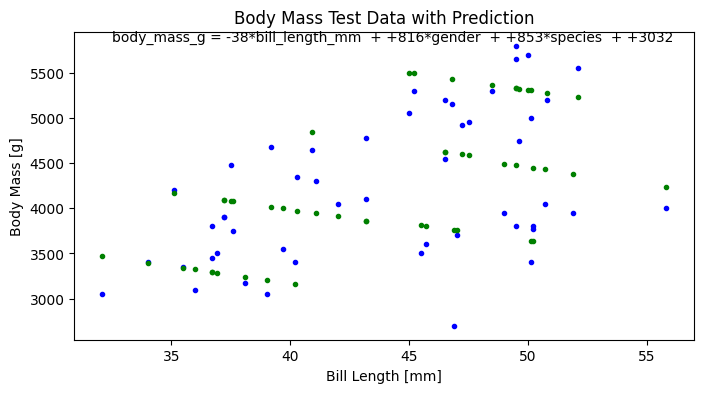

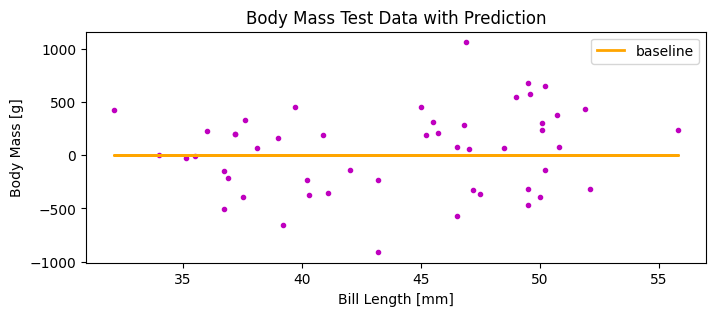

In [30]:
ax1 = df_test.plot(kind='scatter', x='bill_length_mm', y='body_mass_g', figsize=(8,4), style="o", s=9, c='b')
df_test.plot(kind='scatter', x='bill_length_mm', y='prediction', figsize=(8,4), style="o", s=9, c='g', ax=ax1)
ax1.annotate(equation, xy=(32.5, 5850))
plt.title('Body Mass Test Data with Prediction')
plt.xlabel('Bill Length [mm]')
plt.ylabel('Body Mass [g]')

ax2 = df_test.plot(kind='scatter', x='bill_length_mm', y='residual', figsize=(8,3), style="o", s=9, c='m')
df_test.plot(kind='line', x='bill_length_mm', y='baseline', figsize=(8,3), lw=2, style='-', c='orange', ax=ax2)
plt.title('Body Mass Test Data with Prediction')
plt.xlabel('Bill Length [mm]')
plt.ylabel('Body Mass [g]')
plt.show()

## Two Independent Variables

In [31]:
penguins.head(2)

,body_mass_g,bill_length_mm,gender,species
0,3750.0,39.1,Male,Adelie
1,3800.0,39.5,Female,Adelie


In [32]:
df = penguins[penguins.gender=='Male']

In [33]:
df.head(2)

,body_mass_g,bill_length_mm,gender,species
0,3750.0,39.1,Male,Adelie
4,3650.0,39.3,Male,Adelie


In [34]:
x_data = df[["bill_length_mm", "species"]]
y_data = df[["body_mass_g"]]

In [35]:
species_map = {'Adelie':1, 'Chinstrap':2, 'Gentoo':3}
x_data.loc[:,'species'] = x_data.species.map(species_map).astype(int)

### Model

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15)

In [37]:
model = LinearRegression()

In [38]:
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
r_squared = model.score(x_test, y_test)
mse = mean_squared_error(y_test, y_hat)

In [39]:
print(f'{r_squared = :.0%} {mse = :.0f}')

r_squared = 70% mse = 180748


### Results

In [40]:
df_test = x_test[:]
df_test.insert(2, 'body_mass_g', y_test)
df_test.insert(3, 'prediction', y_hat)
df_test.insert(4, 'residual', (df_test.prediction - df_test.body_mass_g))
df_test.insert(5, 'baseline', np.zeros(df_test.shape[0]))
df_test.head(2)

,bill_length_mm,species,body_mass_g,prediction,residual,baseline
95,41.0,1,4725.0,3906.861648,-818.138352,0.0
159,52.0,2,4050.0,4326.670223,276.670223,0.0


### Equation

In [41]:
term_0 = f'{'+' if model.coef_[0][0] >= 0 else ''}{model.coef_[0][0]:.0f}*{df_test.columns[0]} '
term_1 = f'{'+' if model.coef_[0][1] >= 0 else ''}{model.coef_[0][1]:.0f}*{df_test.columns[1]} '
term_2 = f'{'+' if model.intercept_ >= 0 else ''}{model.intercept_[0]:.0f}'
equation = f'{df_test.columns[3]} = {term_0} {term_1} {term_2}'
print(equation)

prediction = -47*bill_length_mm  +932*species  +4883


#### Plot

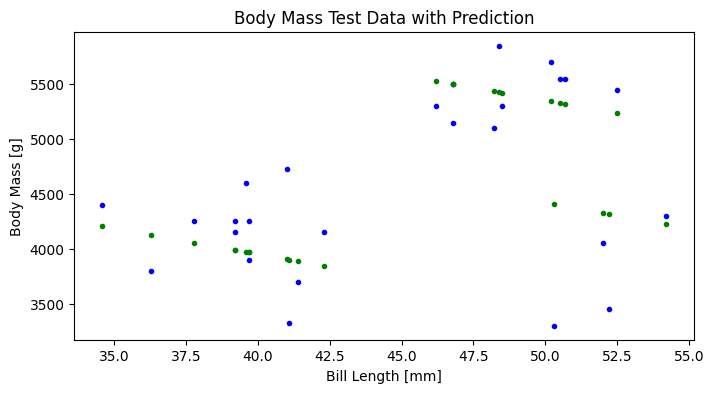

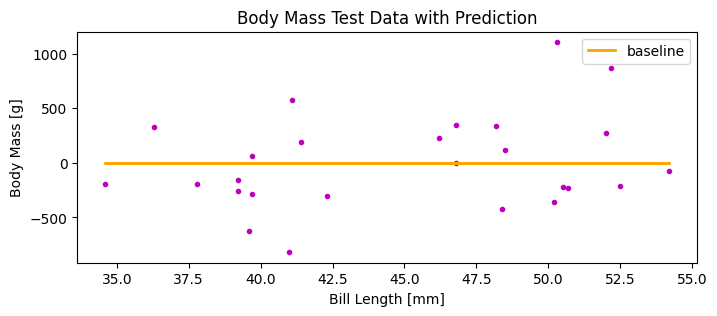

In [42]:
ax1 = df_test.plot(kind='scatter', x='bill_length_mm', y='body_mass_g', figsize=(8,4), style="o", s=9, c='b')
df_test.plot(kind='scatter', x='bill_length_mm', y='prediction', figsize=(8,4), style="o", s=9, c='g', ax=ax1)
ax1.annotate(equation, xy=(32.5, 5850))
plt.title('Body Mass Test Data with Prediction')
plt.xlabel('Bill Length [mm]')
plt.ylabel('Body Mass [g]')

ax2 = df_test.plot(kind='scatter', x='bill_length_mm', y='residual', figsize=(8,3), style="o", s=9, c='m')
df_test.plot(kind='line', x='bill_length_mm', y='baseline', figsize=(8,3), lw=2, style='-', c='orange', ax=ax2)
plt.title('Body Mass Test Data with Prediction')
plt.xlabel('Bill Length [mm]')
plt.ylabel('Body Mass [g]')
plt.show()

### 3D Plot

In [43]:
df_test.shape

(26, 6)

In [44]:
print(equation)

prediction = -47*bill_length_mm  +932*species  +4883


In [45]:
df_test.head()

,bill_length_mm,species,body_mass_g,prediction,residual,baseline
95,41.0,1,4725.0,3906.861648,-818.138352,0.0
159,52.0,2,4050.0,4326.670223,276.670223,0.0
80,36.3,1,3800.0,4125.635366,325.635366,0.0
162,50.3,2,3300.0,4405.801142,1105.801142,0.0
177,54.2,2,4300.0,4224.265504,-75.734496,0.0


In [46]:
species_map

{'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}

In [47]:
dict([(m,n) for n,m in species_map.items()])

{1: 'Adelie', 2: 'Chinstrap', 3: 'Gentoo'}

In [48]:
[s for s in species_map.keys()]

['Adelie', 'Chinstrap', 'Gentoo']

In [49]:
species_color_map = {1: ['purple','blue'], 2: ['green','yellow'], 3: ['red','orange']}
species_color_map

{1: ['purple', 'blue'], 2: ['green', 'yellow'], 3: ['red', 'orange']}

In [61]:
(type(z))

numpy.ndarray

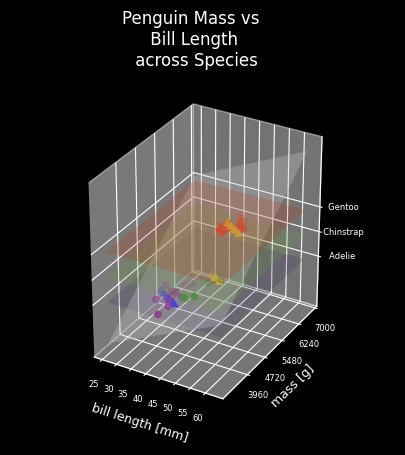

In [88]:
fig = plt.figure(figsize=(7,5))
fig.suptitle('Penguin Mass vs \n Bill Length \n across Species')
plt.style.use('dark_background') 
ax = fig.add_subplot(projection='3d')

# data (circles)
for species in df_test.species.unique():
    df_species = df_test[df_test.species==species]
    xs = df_species.bill_length_mm 
    ys = df_species.body_mass_g    
    zs = df_species.species        
    ax.scatter(xs, ys, zs, marker='o', color=species_color_map[species][0])

# prediction (triangles)
for species in df_test.species.unique():
    df_species = df_test[df_test.species==species]
    xs = df_species.bill_length_mm 
    ys = df_species.prediction     
    zs = df_species.species        
    ax.scatter(xs, ys, zs, marker='^', color=species_color_map[species][1])

# equation plane
#  prediction = -53*bill_length_mm  +942*species  +5140
#  z = (y + 53x -5140)/942
xx, yy = np.meshgrid(range(25,65,2), range(3200,7000,190))
z =  (yy + 53*xx -5140)/942
ax.plot_surface(xx, yy, z, color='white', alpha=1/3)

# species planes
ax.plot_surface(xx, yy, np.full((20,20), 1), color='#46327e', alpha=1/5)
ax.plot_surface(xx, yy, np.full((20,20), 2), color='#90d743', alpha=1/5)
ax.plot_surface(xx, yy, np.full((20,20), 3), color='#ff4000', alpha=1/5)

ax.set_box_aspect(aspect=(3,4,4), zoom=0.8)
ax.tick_params(axis='both', which='major', labelsize=6)
ax.set_xlabel('bill length [mm]', fontsize=9)
ax.set_ylabel('mass [g]', fontsize=9)
ax.set_zlabel('', fontsize=9)
ax.set_xticks(range(25,65,5))
ax.set_yticks(range(3960,7001,760))
ax.set_zticks(labels=['     '+s for s in species_map.keys()], ticks=range(1,4))
#ax.legend()

plt.savefig('peng_3d_001.png')
plt.show()